In [1]:
import pandas as pd

In [3]:
commerce=pd.read_csv("commercial_area.csv", encoding="euc-kr")

In [7]:
commerce.head(3)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,...,여성연령대_60_이상_토요일시간대_3_유동인구_수,여성연령대_60_이상_토요일시간대_4_유동인구_수,여성연령대_60_이상_토요일시간대_5_유동인구_수,여성연령대_60_이상_토요일시간대_6_유동인구_수,여성연령대_60_이상_일요일시간대_1_유동인구_수,여성연령대_60_이상_일요일시간대_2_유동인구_수,여성연령대_60_이상_일요일시간대_3_유동인구_수,여성연령대_60_이상_일요일시간대_4_유동인구_수,여성연령대_60_이상_일요일시간대_5_유동인구_수,여성연령대_60_이상_일요일시간대_6_유동인구_수
0,2019,1,A,골목상권,1001010,풍성로37가길,2607258,1287202,1320057,143110,...,5207,4951,5990,3158,5200,5790,5195,4828,5440,2962
1,2019,1,A,골목상권,1001009,천호옛길,3070192,1485625,1584578,156547,...,6542,6385,7321,3525,5580,8098,8496,6481,7664,3255
2,2019,1,A,골목상권,1001008,천호옛14길,3204360,1511917,1692444,155717,...,7397,8462,8235,3086,4609,6775,8508,8209,8432,2757


In [9]:
commerce.shape

(5050, 532)

In [10]:
commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Columns: 532 entries, 기준_년_코드 to 여성연령대_60_이상_일요일시간대_6_유동인구_수
dtypes: int64(529), object(3)
memory usage: 20.5+ MB


In [60]:
commerce_area=commercial[["상권_코드_명","총_유동인구_수"]]

In [61]:
commerce_area.head(2)

,상권_코드_명,총_유동인구_수
0,풍성로37가길,2607258
1,천호옛길,3070192


In [62]:
# commerce_area.columns["area","all_assenger"]

In [63]:
commerce_area["상권_코드_명"].unique().shape

(1010,)

In [64]:
import re

In [65]:
def area_group(x):
    pattern=re.compile("[0-9]")
    data=re.sub(pattern,"",x)
    return data

In [66]:
commerce_area["상권_코드_명"]=commerce_area["상권_코드_명"].map(area_group)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
commerce_area["상권_코드_명"].unique().shape

(399,)

In [83]:
commerce_area.head()

,상권_코드_명,총_유동인구_수
0,풍성로가길,2607258
1,천호옛길,3070192
2,천호옛길,3204360
3,천호대로길,140226
4,천호대로길,1461185


In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

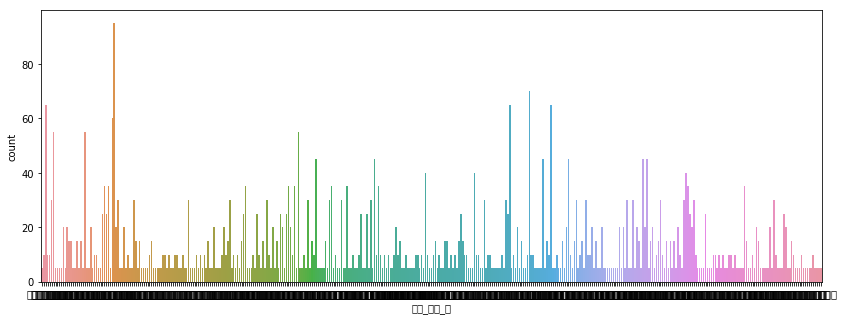

In [99]:
fig, axes = plt.subplots(1,1, figsize=(14,5))
sns.countplot('상권_코드_명',data=commerce_area)

In [72]:
commerce_area["총_유동인구_수"].mean()

1603497.4457425743

In [79]:
summary=commerce_area[commerce_area["총_유동인구_수"]>1603497]

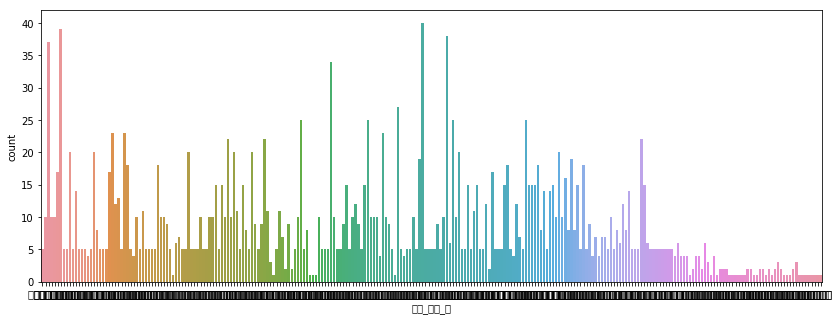

In [80]:
fig, axes = plt.subplots(1,1, figsize=(14,5))
sns.countplot('상권_코드_명',data=summary)

In [82]:
summary["상권_코드_명"].count()

2162

In [ ]:
com=commerce_area.groupby("상권_코드_명").sum()

In [ ]:
com.reset_index(level=['상권_코드_명'], inplace = True)

In [ ]:
com.head()

In [105]:
com["총_유동인구_수"].mean()

20294892.483709272

In [110]:
com2=com[com["총_유동인구_수"]>20294892]

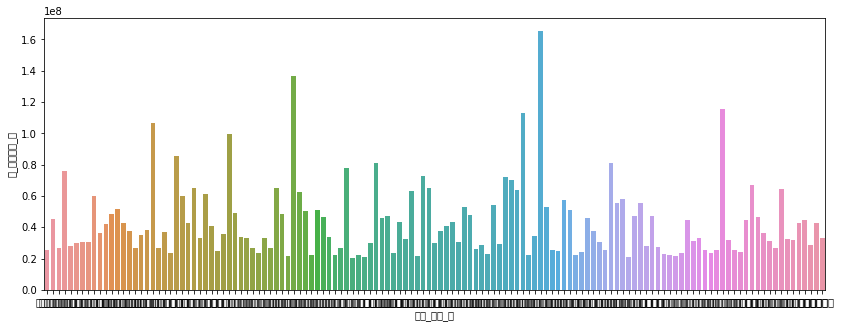

In [115]:
fig, axes = plt.subplots(1,1, figsize=(14,5))
sns.barplot(x='상권_코드_명', y='총_유동인구_수', data=com2)

In [117]:
com2.shape

(133, 2)